<a href="https://colab.research.google.com/github/s12409/fuzzy_wash_machine/blob/main/fuzzy_washmachinewithui_312512073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tkinter import *
from tkinter import messagebox
import matplotlib.pyplot as plt

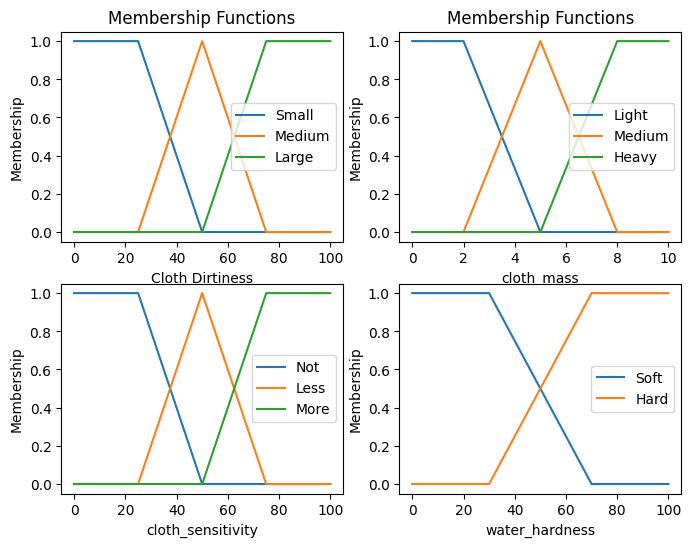

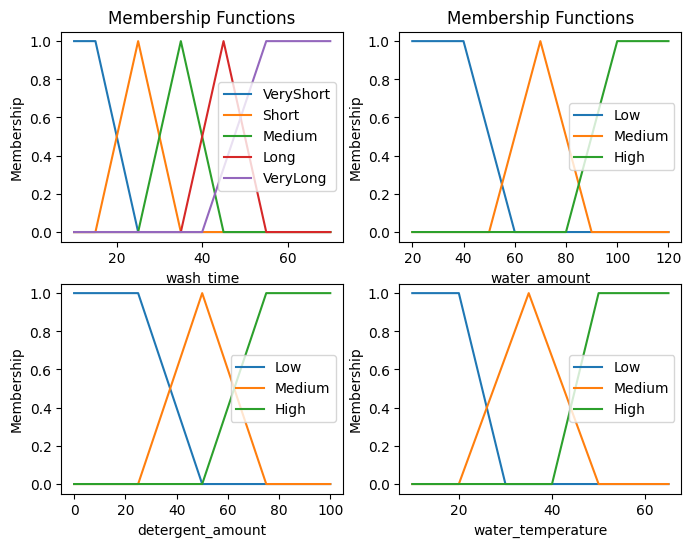

In [ ]:

cloth_dirtiness = np.arange(0,101,1)
cloth_mass = np.arange(0,11,1)
cloth_sensitivity = np.arange(0,101,1)
water_hardness = np.arange(0,101,1)

#output
wash_time = np.arange(10,71,1)  # should be larger than 10
water_amount = np.arange(20,121,1)
detergent_amount = np.arange(0,101,1)
water_temperature = np.arange(10,66,1)

cloth_dirtiness_Small = fuzz.trapmf(cloth_dirtiness, [0,0,25,50])
cloth_dirtiness_Medium = fuzz.trimf(cloth_dirtiness, [25,50,75])
cloth_dirtiness_Large = fuzz.trapmf(cloth_dirtiness, [50,75,100,100])

cloth_mass_Light = fuzz.trapmf(cloth_mass, [0,0,2,5])
cloth_mass_Medium = fuzz.trimf(cloth_mass, [2,5,8])
cloth_mass_Heavy = fuzz.trapmf(cloth_mass, [5,8,10,10])

cloth_sensitivity_NotSensitive = fuzz.trapmf(cloth_sensitivity,[0,0,25,50])
cloth_sensitivity_LessSensitive = fuzz.trimf(cloth_sensitivity, [25,50,75])
cloth_sensitivity_MoreSensitive = fuzz.trapmf(cloth_sensitivity, [50,75,100,100])

water_hardness_Soft = fuzz.trapmf(water_hardness, [0,0,30,70])
## water_hardness_Moderate = fuzz.trimf(water_hardness, [20,50,80])
water_hardness_Hard = fuzz.trapmf(water_hardness, [30,70,100,100])

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot(cloth_dirtiness, cloth_dirtiness_Small, label='Small')
plt.plot(cloth_dirtiness, cloth_dirtiness_Medium, label='Medium')
plt.plot(cloth_dirtiness, cloth_dirtiness_Large, label='Large')
plt.title('Membership Functions')
plt.xlabel('Cloth Dirtiness')
plt.ylabel('Membership')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(cloth_mass, cloth_mass_Light, label='Light')
plt.plot(cloth_mass, cloth_mass_Medium, label='Medium')
plt.plot(cloth_mass, cloth_mass_Heavy, label='Heavy')
plt.title('Membership Functions')
plt.xlabel('cloth_mass')
plt.ylabel('Membership')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(cloth_sensitivity, cloth_sensitivity_NotSensitive, label='Not')
plt.plot(cloth_sensitivity, cloth_sensitivity_LessSensitive, label='Less')
plt.plot(cloth_sensitivity, cloth_sensitivity_MoreSensitive, label='More')
plt.xlabel('cloth_sensitivity')
plt.ylabel('Membership')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(water_hardness, water_hardness_Soft, label='Soft')
plt.plot(water_hardness, water_hardness_Hard, label='Hard')
plt.xlabel('water_hardness')
plt.ylabel('Membership')
plt.legend()
plt.show()

wash_time_VeryShort = fuzz.trapmf(wash_time, [10,10,15,25])
wash_time_Short = fuzz.trimf(wash_time, [15,25,35])
wash_time_Medium = fuzz.trimf(wash_time, [25,35,45])
wash_time_Long = fuzz.trimf(wash_time, [35,45,55])
wash_time_VeryLong = fuzz.trapmf(wash_time, [40,55,70,70])

water_amount_Low = fuzz.trapmf(water_amount, [20,20,40,60])
water_amount_Medium = fuzz.trimf(water_amount, [50,70,90])
water_amount_High = fuzz.trapmf(water_amount, [80,100,120,120])

detergent_amount_Low = fuzz.trapmf(detergent_amount, [0,0,25,50])
detergent_amount_Medium = fuzz.trimf(detergent_amount, [25,50,75])
detergent_amount_High = fuzz.trapmf(detergent_amount, [50,75,100,100])

water_temperature_Low = fuzz.trapmf(water_temperature, [10,10,20,30])
water_temperature_Medium = fuzz.trimf(water_temperature, [20,35,50])
water_temperature_High = fuzz.trapmf(water_temperature, [40,50,65,65])

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot( wash_time,  wash_time_VeryShort, label='VeryShort')
plt.plot(wash_time,  wash_time_Short, label='Short')
plt.plot(wash_time,  wash_time_Medium, label='Medium')
plt.plot(wash_time,  wash_time_Long, label='Long')
plt.plot(wash_time,  wash_time_VeryLong, label='VeryLong')
plt.title('Membership Functions')
plt.xlabel('wash_time')
plt.ylabel('Membership')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(water_amount, water_amount_Low, label='Low')
plt.plot(water_amount, water_amount_Medium, label='Medium')
plt.plot(water_amount, water_amount_High, label='High')
plt.title('Membership Functions')
plt.xlabel('water_amount')
plt.ylabel('Membership')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(detergent_amount, detergent_amount_Low, label='Low')
plt.plot(detergent_amount, detergent_amount_Medium, label='Medium')
plt.plot(detergent_amount, detergent_amount_High, label='High')
plt.xlabel('detergent_amount')
plt.ylabel('Membership')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(water_temperature, water_temperature_Low, label='Low')
plt.plot(water_temperature, water_temperature_Medium, label='Medium')
plt.plot(water_temperature, water_temperature_High, label='High')
plt.xlabel('water_temperature')
plt.ylabel('Membership')
plt.legend()
plt.show()

In [ ]:
def test( cloth_dirtiness_value, cloth_mass_value, cloth_sensitivity_value, water_hardness_value):

    #input:衣物髒污程度、衣物多寡、布料敏感程度、水質軟硬

    cloth_dirtiness = np.arange(0,101,1)
    cloth_mass = np.arange(0,11,1)
    cloth_sensitivity = np.arange(0,101,1)
    water_hardness = np.arange(0,101,1)

    #output:洗衣時間、水量、洗衣劑用量、水溫
    wash_time = np.arange(10,71,1)  # should be larger than 10
    water_amount = np.arange(20,121,1)
    detergent_amount = np.arange(0,101,1)
    water_temperature = np.arange(10,66,1)

    output_list = [wash_time,  water_amount, detergent_amount, water_temperature]
    output_name = ['Wash Time',  'Water Amount', 'Detergent Amount', 'Water Temperature']
    output_unit = ['Minutes',  'Liters', 'Milliliters', '°C']

    cloth_dirtiness_Small = fuzz.trapmf(cloth_dirtiness, [0,0,25,50])
    cloth_dirtiness_Medium = fuzz.trimf(cloth_dirtiness, [25,50,75])
    cloth_dirtiness_Large = fuzz.trapmf(cloth_dirtiness, [50,75,100,100])

    cloth_mass_Light = fuzz.trapmf(cloth_mass, [0,0,2,5])
    cloth_mass_Medium = fuzz.trimf(cloth_mass, [2,5,8])
    cloth_mass_Heavy = fuzz.trapmf(cloth_mass, [5,8,10,10])

    cloth_sensitivity_NotSensitive = fuzz.trapmf(cloth_sensitivity, [0,0,25,50])
    cloth_sensitivity_LessSensitive = fuzz.trimf(cloth_sensitivity, [25,50,75])
    cloth_sensitivity_MoreSensitive = fuzz.trapmf(cloth_sensitivity, [50,75,100,100])

    water_hardness_Soft = fuzz.trapmf(water_hardness, [0,0,30,70])
    ## water_hardness_Moderate = fuzz.trimf(water_hardness, [20,50,80])
    water_hardness_Hard = fuzz.trapmf(water_hardness, [30,70,100,100])

    wash_time_VeryShort = fuzz.trapmf(wash_time, [10,10,15,25])
    wash_time_Short = fuzz.trimf(wash_time, [15,25,35])
    wash_time_Medium = fuzz.trimf(wash_time, [25,35,45])
    wash_time_Long = fuzz.trimf(wash_time, [35,45,55])
    wash_time_VeryLong = fuzz.trapmf(wash_time, [40,55,70,70])

    water_amount_Low = fuzz.trapmf(water_amount, [20,20,40,60])
    water_amount_Medium = fuzz.trimf(water_amount, [50,70,90])
    water_amount_High = fuzz.trapmf(water_amount, [80,100,120,120])

    detergent_amount_Low = fuzz.trapmf(detergent_amount, [0,0,25,50])
    detergent_amount_Medium = fuzz.trimf(detergent_amount, [25,50,75])
    detergent_amount_High = fuzz.trapmf(detergent_amount, [50,75,100,100])

    water_temperature_Low = fuzz.trapmf(water_temperature, [10,10,20,30])
    water_temperature_Medium = fuzz.trimf(water_temperature, [20,35,50])
    water_temperature_High = fuzz.trapmf(water_temperature, [40,50,65,65])
    ## if-then rules
##
    ## Rule 1
    rule1_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule1_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule1_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule1_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_1_antecedent = min(rule1_cloth_dirtiness ,rule1_cloth_mass, rule1_cloth_sensitivity, rule1_water_hardness)

    rule_1_clip = []
    rule_1_clip.append(np.fmin(rule_1_antecedent, wash_time_VeryShort))
    rule_1_clip.append(np.fmin(rule_1_antecedent, water_amount_Low))
    rule_1_clip.append(np.fmin(rule_1_antecedent, detergent_amount_Low))
    rule_1_clip.append(np.fmin(rule_1_antecedent, water_temperature_Low))

    ## Rule 2
    rule2_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule2_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule2_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule2_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_2_antecedent = min(rule2_cloth_dirtiness ,rule2_cloth_mass, rule2_cloth_sensitivity, rule2_water_hardness)

    rule_2_clip = []
    rule_2_clip.append(np.fmin(rule_2_antecedent, wash_time_VeryShort))
    rule_2_clip.append(np.fmin(rule_2_antecedent, water_amount_Low))
    rule_2_clip.append(np.fmin(rule_2_antecedent, detergent_amount_Low))
    rule_2_clip.append(np.fmin(rule_2_antecedent, water_temperature_Low))

    ## Rule 3
    rule3_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule3_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule3_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule3_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_3_antecedent = min(rule3_cloth_dirtiness ,rule3_cloth_mass, rule3_cloth_sensitivity, rule3_water_hardness)

    rule_3_clip = []
    rule_3_clip.append(np.fmin(rule_3_antecedent, wash_time_VeryShort))
    rule_3_clip.append(np.fmin(rule_3_antecedent, water_amount_Low))
    rule_3_clip.append(np.fmin(rule_3_antecedent, detergent_amount_Low))
    rule_3_clip.append(np.fmin(rule_3_antecedent, water_temperature_Low))

    ## Rule 4
    rule4_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule4_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule4_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule4_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_4_antecedent = min(rule4_cloth_dirtiness ,rule4_cloth_mass, rule4_cloth_sensitivity, rule4_water_hardness)

    rule_4_clip = []
    rule_4_clip.append(np.fmin(rule_4_antecedent, wash_time_Short))
    rule_4_clip.append(np.fmin(rule_4_antecedent, water_amount_Medium))
    rule_4_clip.append(np.fmin(rule_4_antecedent, detergent_amount_Low))
    rule_4_clip.append(np.fmin(rule_4_antecedent, water_temperature_Low))

    ## Rule 5
    rule5_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule5_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule5_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule5_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_5_antecedent = min(rule5_cloth_dirtiness,rule5_cloth_mass, rule5_cloth_sensitivity, rule5_water_hardness)

    rule_5_clip = []
    rule_5_clip.append(np.fmin(rule_5_antecedent, wash_time_VeryShort))
    rule_5_clip.append(np.fmin(rule_5_antecedent, water_amount_Medium))
    rule_5_clip.append(np.fmin(rule_5_antecedent, detergent_amount_Low))
    rule_5_clip.append(np.fmin(rule_5_antecedent, water_temperature_Low))

    ## Rule 6
    rule6_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule6_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule6_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule6_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_6_antecedent = min(rule6_cloth_dirtiness,rule6_cloth_mass, rule6_cloth_sensitivity, rule6_water_hardness)

    rule_6_clip = []
    rule_6_clip.append(np.fmin(rule_6_antecedent, wash_time_VeryShort))
    rule_6_clip.append(np.fmin(rule_6_antecedent, water_amount_Medium))
    rule_6_clip.append(np.fmin(rule_6_antecedent, detergent_amount_Low))
    rule_6_clip.append(np.fmin(rule_6_antecedent, water_temperature_Low))

    ## Rule 7
    rule7_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule7_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule7_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule7_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_7_antecedent = min(rule7_cloth_dirtiness,rule7_cloth_mass, rule7_cloth_sensitivity, rule7_water_hardness)

    rule_7_clip = []
    rule_7_clip.append(np.fmin(rule_7_antecedent, wash_time_Medium))
    rule_7_clip.append(np.fmin(rule_7_antecedent, water_amount_Medium))
    rule_7_clip.append(np.fmin(rule_7_antecedent, detergent_amount_Medium))
    rule_7_clip.append(np.fmin(rule_7_antecedent, water_temperature_Medium))

    ## Rule 8
    rule8_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule8_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule8_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule8_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_8_antecedent = min(rule8_cloth_dirtiness,rule8_cloth_mass, rule8_cloth_sensitivity, rule8_water_hardness)

    rule_8_clip = []
    rule_8_clip.append(np.fmin(rule_8_antecedent, wash_time_Medium))
    rule_8_clip.append(np.fmin(rule_8_antecedent, water_amount_High))
    rule_8_clip.append(np.fmin(rule_8_antecedent, detergent_amount_Medium))
    rule_8_clip.append(np.fmin(rule_8_antecedent, water_temperature_Low))

    ## Rule 9
    rule9_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule9_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule9_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule9_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_9_antecedent = min(rule9_cloth_dirtiness,rule9_cloth_mass, rule9_cloth_sensitivity, rule9_water_hardness)

    rule_9_clip = []
    rule_9_clip.append(np.fmin(rule_9_antecedent, wash_time_Medium))
    rule_9_clip.append(np.fmin(rule_9_antecedent, water_amount_High))
    rule_9_clip.append(np.fmin(rule_9_antecedent, detergent_amount_Medium))
    rule_9_clip.append(np.fmin(rule_9_antecedent, water_temperature_Low))

    ## Rule 10
    rule10_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule10_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule10_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule10_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_10_antecedent = min(rule10_cloth_dirtiness,rule10_cloth_mass, rule10_cloth_sensitivity, rule10_water_hardness)

    rule_10_clip = []
    rule_10_clip.append(np.fmin(rule_10_antecedent, wash_time_VeryShort))
    rule_10_clip.append(np.fmin(rule_10_antecedent, water_amount_Low))
    rule_10_clip.append(np.fmin(rule_10_antecedent, detergent_amount_Medium))
    rule_10_clip.append(np.fmin(rule_10_antecedent, water_temperature_Medium))

    ## Rule 11
    rule11_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule11_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule11_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule11_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_11_antecedent = min(rule11_cloth_dirtiness,rule11_cloth_mass, rule11_cloth_sensitivity, rule11_water_hardness)

    rule_11_clip = []
    rule_11_clip.append(np.fmin(rule_11_antecedent, wash_time_Short))
    rule_11_clip.append(np.fmin(rule_11_antecedent, water_amount_Medium))
    rule_11_clip.append(np.fmin(rule_11_antecedent, detergent_amount_Medium))
    rule_11_clip.append(np.fmin(rule_11_antecedent, water_temperature_Low))

    ## Rule 12
    rule12_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule12_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule12_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule12_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_12_antecedent = min(rule12_cloth_dirtiness,rule12_cloth_mass, rule12_cloth_sensitivity, rule12_water_hardness)

    rule_12_clip = []
    rule_12_clip.append(np.fmin(rule_12_antecedent, wash_time_Short))
    rule_12_clip.append(np.fmin(rule_12_antecedent, water_amount_Medium))
    rule_12_clip.append(np.fmin(rule_12_antecedent, detergent_amount_Medium))
    rule_12_clip.append(np.fmin(rule_12_antecedent, water_temperature_Low))

    ## Rule 13
    rule13_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule13_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule13_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule13_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_13_antecedent = min(rule13_cloth_dirtiness,rule13_cloth_mass, rule13_cloth_sensitivity, rule13_water_hardness)

    rule_13_clip = []
    rule_13_clip.append(np.fmin(rule_13_antecedent, wash_time_Medium))
    rule_13_clip.append(np.fmin(rule_13_antecedent, water_amount_Medium))
    rule_13_clip.append(np.fmin(rule_13_antecedent, detergent_amount_Medium))
    rule_13_clip.append(np.fmin(rule_13_antecedent, water_temperature_Medium))

    ## Rule 14
    rule14_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule14_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule14_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule14_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_14_antecedent = min(rule14_cloth_dirtiness,rule14_cloth_mass, rule14_cloth_sensitivity, rule14_water_hardness)

    rule_14_clip = []
    rule_14_clip.append(np.fmin(rule_14_antecedent, wash_time_Medium))
    rule_14_clip.append(np.fmin(rule_14_antecedent, water_amount_Medium))
    rule_14_clip.append(np.fmin(rule_14_antecedent, detergent_amount_Medium))
    rule_14_clip.append(np.fmin(rule_14_antecedent, water_temperature_Low))

    ## Rule 15
    rule15_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule15_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule15_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule15_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_15_antecedent = min(rule15_cloth_dirtiness,rule15_cloth_mass, rule15_cloth_sensitivity, rule15_water_hardness)

    rule_15_clip = []
    rule_15_clip.append(np.fmin(rule_15_antecedent, wash_time_Medium))
    rule_15_clip.append(np.fmin(rule_15_antecedent, water_amount_Medium))
    rule_15_clip.append(np.fmin(rule_15_antecedent, detergent_amount_Medium))
    rule_15_clip.append(np.fmin(rule_15_antecedent, water_temperature_Low))

    ## Rule 16
    rule16_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule16_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule16_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule16_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_16_antecedent = min(rule16_cloth_dirtiness,rule16_cloth_mass, rule16_cloth_sensitivity, rule16_water_hardness)

    rule_16_clip = []
    rule_16_clip.append(np.fmin(rule_16_antecedent, wash_time_Medium))
    rule_16_clip.append(np.fmin(rule_16_antecedent, water_amount_Medium))
    rule_16_clip.append(np.fmin(rule_16_antecedent, detergent_amount_Medium))
    rule_16_clip.append(np.fmin(rule_16_antecedent, water_temperature_Medium))

    ## Rule 17
    rule17_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule17_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule17_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule17_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_17_antecedent = min(rule17_cloth_dirtiness,rule17_cloth_mass, rule17_cloth_sensitivity, rule17_water_hardness)

    rule_17_clip = []
    rule_17_clip.append(np.fmin(rule_17_antecedent, wash_time_Medium))
    rule_17_clip.append(np.fmin(rule_17_antecedent, water_amount_High))
    rule_17_clip.append(np.fmin(rule_17_antecedent, detergent_amount_Medium))
    rule_17_clip.append(np.fmin(rule_17_antecedent, water_temperature_Medium))

    ## Rule 18
    rule18_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule18_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule18_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule18_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_18_antecedent = min(rule18_cloth_dirtiness,rule18_cloth_mass, rule18_cloth_sensitivity, rule18_water_hardness)

    rule_18_clip = []
    rule_18_clip.append(np.fmin(rule_18_antecedent, wash_time_Medium))
    rule_18_clip.append(np.fmin(rule_18_antecedent, water_amount_High))
    rule_18_clip.append(np.fmin(rule_18_antecedent, detergent_amount_Medium))
    rule_18_clip.append(np.fmin(rule_18_antecedent, water_temperature_Low))

    ## Rule 19
    rule19_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule19_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule19_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule19_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_19_antecedent = min(rule19_cloth_dirtiness,rule19_cloth_mass, rule19_cloth_sensitivity, rule19_water_hardness)

    rule_19_clip = []
    rule_19_clip.append(np.fmin(rule_19_antecedent, wash_time_Medium))
    rule_19_clip.append(np.fmin(rule_19_antecedent, water_amount_Medium))
    rule_19_clip.append(np.fmin(rule_19_antecedent, detergent_amount_Medium))
    rule_19_clip.append(np.fmin(rule_19_antecedent, water_temperature_Low))

    ## Rule 20
    rule20_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule20_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule20_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule20_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_20_antecedent = min(rule20_cloth_dirtiness,rule20_cloth_mass, rule20_cloth_sensitivity, rule20_water_hardness)

    rule_20_clip = []
    rule_20_clip.append(np.fmin(rule_20_antecedent, wash_time_Medium))
    rule_20_clip.append(np.fmin(rule_20_antecedent, water_amount_Medium))
    rule_20_clip.append(np.fmin(rule_20_antecedent, detergent_amount_High))
    rule_20_clip.append(np.fmin(rule_20_antecedent, water_temperature_Low))

    ## Rule 21
    rule21_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule21_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule21_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule21_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_21_antecedent = min(rule21_cloth_dirtiness,rule21_cloth_mass, rule21_cloth_sensitivity, rule21_water_hardness)

    rule_21_clip = []
    rule_21_clip.append(np.fmin(rule_21_antecedent, wash_time_Medium))
    rule_21_clip.append(np.fmin(rule_21_antecedent, water_amount_High))
    rule_21_clip.append(np.fmin(rule_21_antecedent, detergent_amount_High))
    rule_21_clip.append(np.fmin(rule_21_antecedent, water_temperature_Low))

    ## Rule 22
    rule22_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule22_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule22_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule22_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_22_antecedent = min(rule22_cloth_dirtiness,rule22_cloth_mass, rule22_cloth_sensitivity, rule22_water_hardness)

    rule_22_clip = []
    rule_22_clip.append(np.fmin(rule_22_antecedent, wash_time_Long))
    rule_22_clip.append(np.fmin(rule_22_antecedent, water_amount_Medium))
    rule_22_clip.append(np.fmin(rule_22_antecedent, detergent_amount_High))
    rule_22_clip.append(np.fmin(rule_22_antecedent, water_temperature_Medium))

    ## Rule 23
    rule23_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule23_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule23_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule23_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_23_antecedent = min(rule23_cloth_dirtiness,rule23_cloth_mass, rule23_cloth_sensitivity, rule23_water_hardness)

    rule_23_clip = []
    rule_23_clip.append(np.fmin(rule_23_antecedent, wash_time_Long))
    rule_23_clip.append(np.fmin(rule_23_antecedent, water_amount_Medium))
    rule_23_clip.append(np.fmin(rule_23_antecedent, detergent_amount_High))
    rule_23_clip.append(np.fmin(rule_23_antecedent, water_temperature_Medium))

    ## Rule 24
    rule24_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule24_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule24_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule24_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_24_antecedent = min(rule24_cloth_dirtiness,rule24_cloth_mass, rule24_cloth_sensitivity, rule24_water_hardness)

    rule_24_clip = []
    rule_24_clip.append(np.fmin(rule_24_antecedent, wash_time_Medium))
    rule_24_clip.append(np.fmin(rule_24_antecedent, water_amount_High))
    rule_24_clip.append(np.fmin(rule_24_antecedent, detergent_amount_High))
    rule_24_clip.append(np.fmin(rule_24_antecedent, water_temperature_Low))

    ## Rule 25
    rule25_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule25_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule25_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule25_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_25_antecedent = min(rule25_cloth_dirtiness,rule25_cloth_mass, rule25_cloth_sensitivity, rule25_water_hardness)

    rule_25_clip = []
    rule_25_clip.append(np.fmin(rule_25_antecedent, wash_time_VeryLong))
    rule_25_clip.append(np.fmin(rule_25_antecedent, water_amount_High))
    rule_25_clip.append(np.fmin(rule_25_antecedent, detergent_amount_High))
    rule_25_clip.append(np.fmin(rule_25_antecedent, water_temperature_Medium))

    ## Rule 26
    rule26_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule26_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule26_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule26_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_26_antecedent = min(rule26_cloth_dirtiness,rule26_cloth_mass, rule26_cloth_sensitivity, rule26_water_hardness)

    rule_26_clip = []
    rule_26_clip.append(np.fmin(rule_26_antecedent, wash_time_Long))
    rule_26_clip.append(np.fmin(rule_26_antecedent, water_amount_High))
    rule_26_clip.append(np.fmin(rule_26_antecedent, detergent_amount_High))
    rule_26_clip.append(np.fmin(rule_26_antecedent, water_temperature_Medium))

    ## Rule 27
    rule27_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule27_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule27_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule27_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Soft, water_hardness_value)
    rule_27_antecedent = min(rule27_cloth_dirtiness,rule27_cloth_mass, rule27_cloth_sensitivity, rule27_water_hardness)

    rule_27_clip = []
    rule_27_clip.append(np.fmin(rule_27_antecedent, wash_time_Long))
    rule_27_clip.append(np.fmin(rule_27_antecedent, water_amount_High))
    rule_27_clip.append(np.fmin(rule_27_antecedent, detergent_amount_High))
    rule_27_clip.append(np.fmin(rule_27_antecedent, water_temperature_Low))

##
    ## Rule 28
    rule28_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule28_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule28_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule28_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_28_antecedent = min(rule28_cloth_dirtiness ,rule28_cloth_mass, rule28_cloth_sensitivity, rule28_water_hardness)

    rule_28_clip = []
    rule_28_clip.append(np.fmin(rule_28_antecedent, wash_time_VeryShort))
    rule_28_clip.append(np.fmin(rule_28_antecedent, water_amount_Low))
    rule_28_clip.append(np.fmin(rule_28_antecedent, detergent_amount_Low))
    rule_28_clip.append(np.fmin(rule_28_antecedent, water_temperature_Low))

    ## Rule 29
    rule29_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule29_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule29_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule29_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_29_antecedent = min(rule29_cloth_dirtiness ,rule29_cloth_mass, rule29_cloth_sensitivity, rule29_water_hardness)

    rule_29_clip = []
    rule_29_clip.append(np.fmin(rule_29_antecedent, wash_time_VeryShort))
    rule_29_clip.append(np.fmin(rule_29_antecedent, water_amount_Low))
    rule_29_clip.append(np.fmin(rule_29_antecedent, detergent_amount_Low))
    rule_29_clip.append(np.fmin(rule_29_antecedent, water_temperature_Low))

    ## Rule 30
    rule30_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule30_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule30_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule30_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_30_antecedent = min(rule30_cloth_dirtiness ,rule30_cloth_mass, rule30_cloth_sensitivity, rule30_water_hardness)

    rule_30_clip = []
    rule_30_clip.append(np.fmin(rule_30_antecedent, wash_time_VeryShort))
    rule_30_clip.append(np.fmin(rule_30_antecedent, water_amount_Low))
    rule_30_clip.append(np.fmin(rule_30_antecedent, detergent_amount_Low))
    rule_30_clip.append(np.fmin(rule_30_antecedent, water_temperature_Low))

    ## Rule 31
    rule31_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule31_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule31_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule31_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_31_antecedent = min(rule31_cloth_dirtiness ,rule31_cloth_mass, rule31_cloth_sensitivity, rule31_water_hardness)

    rule_31_clip = []
    rule_31_clip.append(np.fmin(rule_31_antecedent, wash_time_Short))
    rule_31_clip.append(np.fmin(rule_31_antecedent, water_amount_Medium))
    rule_31_clip.append(np.fmin(rule_31_antecedent, detergent_amount_Low))
    rule_31_clip.append(np.fmin(rule_31_antecedent, water_temperature_Medium))

    ## Rule 32
    rule32_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule32_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule32_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule32_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_32_antecedent = min(rule32_cloth_dirtiness,rule32_cloth_mass, rule32_cloth_sensitivity, rule32_water_hardness)

    rule_32_clip = []
    rule_32_clip.append(np.fmin(rule_32_antecedent, wash_time_VeryShort))
    rule_32_clip.append(np.fmin(rule_32_antecedent, water_amount_Medium))
    rule_32_clip.append(np.fmin(rule_32_antecedent, detergent_amount_Medium))
    rule_32_clip.append(np.fmin(rule_32_antecedent, water_temperature_Medium))

    ## Rule 33
    rule33_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule33_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule33_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule33_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_33_antecedent = min(rule33_cloth_dirtiness,rule33_cloth_mass, rule33_cloth_sensitivity, rule33_water_hardness)

    rule_33_clip = []
    rule_33_clip.append(np.fmin(rule_33_antecedent, wash_time_VeryShort))
    rule_33_clip.append(np.fmin(rule_33_antecedent, water_amount_Medium))
    rule_33_clip.append(np.fmin(rule_33_antecedent, detergent_amount_Medium))
    rule_33_clip.append(np.fmin(rule_33_antecedent, water_temperature_Low))

    ## Rule 34
    rule34_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule34_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule34_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule34_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_34_antecedent = min(rule34_cloth_dirtiness,rule34_cloth_mass, rule34_cloth_sensitivity, rule34_water_hardness)

    rule_34_clip = []
    rule_34_clip.append(np.fmin(rule_34_antecedent, wash_time_Medium))
    rule_34_clip.append(np.fmin(rule_34_antecedent, water_amount_Medium))
    rule_34_clip.append(np.fmin(rule_34_antecedent, detergent_amount_Medium))
    rule_34_clip.append(np.fmin(rule_34_antecedent, water_temperature_High))

    ## Rule 35
    rule35_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule35_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule35_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule35_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_35_antecedent = min(rule35_cloth_dirtiness,rule35_cloth_mass, rule35_cloth_sensitivity, rule35_water_hardness)

    rule_35_clip = []
    rule_35_clip.append(np.fmin(rule_35_antecedent, wash_time_Medium))
    rule_35_clip.append(np.fmin(rule_35_antecedent, water_amount_High))
    rule_35_clip.append(np.fmin(rule_35_antecedent, detergent_amount_Medium))
    rule_35_clip.append(np.fmin(rule_35_antecedent, water_temperature_Medium))

    ## Rule 36
    rule36_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Small, cloth_dirtiness_value)
    rule36_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule36_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule36_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_36_antecedent = min(rule36_cloth_dirtiness,rule36_cloth_mass, rule36_cloth_sensitivity, rule36_water_hardness)

    rule_36_clip = []
    rule_36_clip.append(np.fmin(rule_36_antecedent, wash_time_Medium))
    rule_36_clip.append(np.fmin(rule_36_antecedent, water_amount_High))
    rule_36_clip.append(np.fmin(rule_36_antecedent, detergent_amount_Medium))
    rule_36_clip.append(np.fmin(rule_36_antecedent, water_temperature_Low))

    ## Rule 37
    rule37_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule37_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule37_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule37_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_37_antecedent = min(rule37_cloth_dirtiness,rule37_cloth_mass, rule37_cloth_sensitivity, rule37_water_hardness)

    rule_37_clip = []
    rule_37_clip.append(np.fmin(rule_37_antecedent, wash_time_Short))
    rule_37_clip.append(np.fmin(rule_37_antecedent, water_amount_Low))
    rule_37_clip.append(np.fmin(rule_37_antecedent, detergent_amount_Medium))
    rule_37_clip.append(np.fmin(rule_37_antecedent, water_temperature_High))

    ## Rule 38
    rule38_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule38_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule38_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule38_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_38_antecedent = min(rule38_cloth_dirtiness,rule38_cloth_mass, rule38_cloth_sensitivity, rule38_water_hardness)

    rule_38_clip = []
    rule_38_clip.append(np.fmin(rule_38_antecedent, wash_time_Short))
    rule_38_clip.append(np.fmin(rule_38_antecedent, water_amount_Low))
    rule_38_clip.append(np.fmin(rule_38_antecedent, detergent_amount_Medium))
    rule_38_clip.append(np.fmin(rule_38_antecedent, water_temperature_Medium))

    ## Rule 39
    rule39_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule39_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule39_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule39_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_39_antecedent = min(rule39_cloth_dirtiness,rule39_cloth_mass, rule39_cloth_sensitivity, rule39_water_hardness)

    rule_39_clip = []
    rule_39_clip.append(np.fmin(rule_39_antecedent, wash_time_Short))
    rule_39_clip.append(np.fmin(rule_39_antecedent, water_amount_Medium))
    rule_39_clip.append(np.fmin(rule_39_antecedent, detergent_amount_Medium))
    rule_39_clip.append(np.fmin(rule_39_antecedent, water_temperature_Low))

    ## Rule 40
    rule40_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule40_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule40_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule40_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_40_antecedent = min(rule40_cloth_dirtiness,rule40_cloth_mass, rule40_cloth_sensitivity, rule40_water_hardness)

    rule_40_clip = []
    rule_40_clip.append(np.fmin(rule_40_antecedent, wash_time_Long))
    rule_40_clip.append(np.fmin(rule_40_antecedent, water_amount_Medium))
    rule_40_clip.append(np.fmin(rule_40_antecedent, detergent_amount_Medium))
    rule_40_clip.append(np.fmin(rule_40_antecedent, water_temperature_Medium))

    ## Rule 41
    rule41_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule41_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule41_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule41_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_41_antecedent = min(rule41_cloth_dirtiness,rule41_cloth_mass, rule41_cloth_sensitivity, rule41_water_hardness)

    rule_41_clip = []
    rule_41_clip.append(np.fmin(rule_41_antecedent, wash_time_Medium))
    rule_41_clip.append(np.fmin(rule_41_antecedent, water_amount_Medium))
    rule_41_clip.append(np.fmin(rule_41_antecedent, detergent_amount_High))
    rule_41_clip.append(np.fmin(rule_41_antecedent, water_temperature_Medium))

    ## Rule 42
    rule42_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule42_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule42_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule42_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_42_antecedent = min(rule42_cloth_dirtiness,rule42_cloth_mass, rule42_cloth_sensitivity, rule42_water_hardness)

    rule_42_clip = []
    rule_42_clip.append(np.fmin(rule_42_antecedent, wash_time_Medium))
    rule_42_clip.append(np.fmin(rule_42_antecedent, water_amount_Medium))
    rule_42_clip.append(np.fmin(rule_42_antecedent, detergent_amount_High))
    rule_42_clip.append(np.fmin(rule_42_antecedent, water_temperature_Low))

    ## Rule 43
    rule43_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule43_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule43_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule43_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_43_antecedent = min(rule43_cloth_dirtiness,rule43_cloth_mass, rule43_cloth_sensitivity, rule43_water_hardness)

    rule_43_clip = []
    rule_43_clip.append(np.fmin(rule_43_antecedent, wash_time_Long))
    rule_43_clip.append(np.fmin(rule_43_antecedent, water_amount_Medium))
    rule_43_clip.append(np.fmin(rule_43_antecedent, detergent_amount_High))
    rule_43_clip.append(np.fmin(rule_43_antecedent, water_temperature_High))

    ## Rule 44
    rule44_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule44_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule44_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule44_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_44_antecedent = min(rule44_cloth_dirtiness,rule44_cloth_mass, rule44_cloth_sensitivity, rule44_water_hardness)

    rule_44_clip = []
    rule_44_clip.append(np.fmin(rule_44_antecedent, wash_time_Medium))
    rule_44_clip.append(np.fmin(rule_44_antecedent, water_amount_High))
    rule_44_clip.append(np.fmin(rule_44_antecedent, detergent_amount_High))
    rule_44_clip.append(np.fmin(rule_44_antecedent, water_temperature_Medium))

    ## Rule 45
    rule45_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Medium, cloth_dirtiness_value)
    rule45_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule45_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule45_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_45_antecedent = min(rule45_cloth_dirtiness,rule45_cloth_mass, rule45_cloth_sensitivity, rule45_water_hardness)

    rule_45_clip = []
    rule_45_clip.append(np.fmin(rule_45_antecedent, wash_time_Medium))
    rule_45_clip.append(np.fmin(rule_45_antecedent, water_amount_High))
    rule_45_clip.append(np.fmin(rule_45_antecedent, detergent_amount_High))
    rule_45_clip.append(np.fmin(rule_45_antecedent, water_temperature_Low))

    ## Rule 46
    rule46_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule46_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule46_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule46_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_46_antecedent = min(rule46_cloth_dirtiness,rule46_cloth_mass, rule46_cloth_sensitivity, rule46_water_hardness)

    rule_46_clip = []
    rule_46_clip.append(np.fmin(rule_46_antecedent, wash_time_Medium))
    rule_46_clip.append(np.fmin(rule_46_antecedent, water_amount_Medium))
    rule_46_clip.append(np.fmin(rule_46_antecedent, detergent_amount_High))
    rule_46_clip.append(np.fmin(rule_46_antecedent, water_temperature_High))

    ## Rule 47
    rule47_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule47_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule47_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule47_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_47_antecedent = min(rule47_cloth_dirtiness,rule47_cloth_mass, rule47_cloth_sensitivity, rule47_water_hardness)

    rule_47_clip = []
    rule_47_clip.append(np.fmin(rule_47_antecedent, wash_time_Medium))
    rule_47_clip.append(np.fmin(rule_47_antecedent, water_amount_Medium))
    rule_47_clip.append(np.fmin(rule_47_antecedent, detergent_amount_High))
    rule_47_clip.append(np.fmin(rule_47_antecedent, water_temperature_Medium))

    ## Rule 48
    rule48_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule48_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Light, cloth_mass_value)
    rule48_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule48_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_48_antecedent = min(rule48_cloth_dirtiness,rule48_cloth_mass, rule48_cloth_sensitivity, rule48_water_hardness)

    rule_48_clip = []
    rule_48_clip.append(np.fmin(rule_48_antecedent, wash_time_Medium))
    rule_48_clip.append(np.fmin(rule_48_antecedent, water_amount_High))
    rule_48_clip.append(np.fmin(rule_48_antecedent, detergent_amount_High))
    rule_48_clip.append(np.fmin(rule_48_antecedent, water_temperature_Low))

    ## Rule 49
    rule49_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule49_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule49_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule49_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_49_antecedent = min(rule49_cloth_dirtiness,rule49_cloth_mass, rule49_cloth_sensitivity, rule49_water_hardness)

    rule_49_clip = []
    rule_49_clip.append(np.fmin(rule_49_antecedent, wash_time_VeryLong))
    rule_49_clip.append(np.fmin(rule_49_antecedent, water_amount_Medium))
    rule_49_clip.append(np.fmin(rule_49_antecedent, detergent_amount_High))
    rule_49_clip.append(np.fmin(rule_49_antecedent, water_temperature_High))

    ## Rule 50
    rule50_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule50_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule50_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule50_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_50_antecedent = min(rule50_cloth_dirtiness,rule50_cloth_mass, rule50_cloth_sensitivity, rule50_water_hardness)

    rule_50_clip = []
    rule_50_clip.append(np.fmin(rule_50_antecedent, wash_time_Long))
    rule_50_clip.append(np.fmin(rule_50_antecedent, water_amount_Medium))
    rule_50_clip.append(np.fmin(rule_50_antecedent, detergent_amount_High))
    rule_50_clip.append(np.fmin(rule_50_antecedent, water_temperature_Medium))

    ## Rule 51
    rule51_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule51_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Medium, cloth_mass_value)
    rule51_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule51_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_51_antecedent = min(rule51_cloth_dirtiness,rule51_cloth_mass, rule51_cloth_sensitivity, rule51_water_hardness)

    rule_51_clip = []
    rule_51_clip.append(np.fmin(rule_51_antecedent, wash_time_Medium))
    rule_51_clip.append(np.fmin(rule_51_antecedent, water_amount_High))
    rule_51_clip.append(np.fmin(rule_51_antecedent, detergent_amount_High))
    rule_51_clip.append(np.fmin(rule_51_antecedent, water_temperature_Low))

    ## Rule 52
    rule52_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule52_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule52_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_NotSensitive, cloth_sensitivity_value)
    rule52_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_52_antecedent = min(rule52_cloth_dirtiness,rule52_cloth_mass, rule52_cloth_sensitivity, rule52_water_hardness)

    rule_52_clip = []
    rule_52_clip.append(np.fmin(rule_52_antecedent, wash_time_VeryLong))
    rule_52_clip.append(np.fmin(rule_52_antecedent, water_amount_High))
    rule_52_clip.append(np.fmin(rule_52_antecedent, detergent_amount_High))
    rule_52_clip.append(np.fmin(rule_52_antecedent, water_temperature_High))

    ## Rule 53
    rule53_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule53_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule53_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_LessSensitive, cloth_sensitivity_value)
    rule53_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_53_antecedent = min(rule53_cloth_dirtiness,rule53_cloth_mass, rule53_cloth_sensitivity, rule53_water_hardness)

    rule_53_clip = []
    rule_53_clip.append(np.fmin(rule_53_antecedent, wash_time_VeryLong))
    rule_53_clip.append(np.fmin(rule_53_antecedent, water_amount_High))
    rule_53_clip.append(np.fmin(rule_53_antecedent, detergent_amount_High))
    rule_53_clip.append(np.fmin(rule_53_antecedent, water_temperature_Medium))

    ## Rule 54
    rule54_cloth_dirtiness = fuzz.interp_membership(cloth_dirtiness, cloth_dirtiness_Large, cloth_dirtiness_value)
    rule54_cloth_mass = fuzz.interp_membership(cloth_mass, cloth_mass_Heavy, cloth_mass_value)
    rule54_cloth_sensitivity = fuzz.interp_membership(cloth_sensitivity, cloth_sensitivity_MoreSensitive, cloth_sensitivity_value)
    rule54_water_hardness = fuzz.interp_membership(water_hardness, water_hardness_Hard, water_hardness_value)
    rule_54_antecedent = min(rule54_cloth_dirtiness,rule54_cloth_mass, rule54_cloth_sensitivity, rule54_water_hardness)

    rule_54_clip = []
    rule_54_clip.append(np.fmin(rule_54_antecedent, wash_time_Long))
    rule_54_clip.append(np.fmin(rule_54_antecedent, water_amount_High))
    rule_54_clip.append(np.fmin(rule_54_antecedent, detergent_amount_High))
    rule_54_clip.append(np.fmin(rule_54_antecedent, water_temperature_Low))

    #Combine all rules into a list
    rule_list = [rule_1_clip, rule_2_clip, rule_3_clip, rule_4_clip, rule_5_clip, rule_6_clip, rule_7_clip, rule_8_clip, rule_9_clip,
                 rule_10_clip, rule_11_clip, rule_12_clip, rule_13_clip, rule_14_clip, rule_15_clip, rule_16_clip, rule_17_clip, rule_18_clip,
                 rule_19_clip, rule_20_clip, rule_21_clip, rule_22_clip, rule_23_clip, rule_24_clip, rule_25_clip, rule_26_clip, rule_27_clip,
                rule_28_clip, rule_29_clip, rule_30_clip, rule_31_clip, rule_32_clip, rule_33_clip, rule_34_clip, rule_35_clip, rule_36_clip,
                rule_37_clip, rule_38_clip, rule_39_clip, rule_40_clip, rule_41_clip, rule_42_clip, rule_43_clip, rule_44_clip, rule_45_clip,
                rule_46_clip, rule_47_clip, rule_48_clip, rule_49_clip, rule_50_clip, rule_51_clip, rule_52_clip, rule_53_clip, rule_54_clip]

    ans_list = []
    for output_idx,output in enumerate(output_list):
        x = rule_list[0]
        for rule_idx in range(1, len(rule_list)):
            if rule_idx==1:
                x = x[output_idx]
            y = rule_list[rule_idx]
            x = np.fmax(x,y[output_idx])
        ans = round(fuzz.defuzz(output, x, 'centroid'),2)
        ans_list.append(ans)
    return ans_list

#     plt.figure(figsize=(8, 6))
#     plt.subplot(2, 2, 1)
#     plt.plot(wash_time,  wash_time_VeryShort, label='VeryShort')
#     plt.plot(wash_time,  wash_time_Short, label='Short')
#     plt.plot(wash_time,  wash_time_Medium, label='Medium')
#     plt.plot(wash_time,  wash_time_Long, label='Long')
#     plt.plot(wash_time,  wash_time_VeryLong, label='VeryLong')
#     plt.plot(wash_time,  ans_list[0])
#     plt.title('Membership Functions')
#     plt.xlabel('wash_time')
#     plt.ylabel('Membership')
#     plt.legend()
#     plt.subplot(2, 2, 2)
#     plt.plot(water_amount, water_amount_Low, label='Low')
#     plt.plot(water_amount, water_amount_Medium, label='Medium')
#     plt.plot(water_amount, water_amount_High, label='High')
#     plt.plot(water_amount, ans_list[1])
#     plt.title('Membership Functions')
#     plt.xlabel('water_amount')
#     plt.ylabel('Membership')
#     plt.legend()
#     plt.subplot(2, 2, 3)
#     plt.plot(detergent_amount, detergent_amount_Low, label='Low')
#     plt.plot(detergent_amount, detergent_amount_Medium, label='Medium')
#     plt.plot(detergent_amount, detergent_amount_High, label='High')
#     plt.plot(detergent_amount, ans_list[2])
#     plt.xlabel('detergent_amount')
#     plt.ylabel('Membership')
#     plt.legend()
#     plt.subplot(2, 2, 4)
#     plt.plot(water_temperature, water_temperature_Low, label='Low')
#     plt.plot(water_temperature, water_temperature_Medium, label='Medium')
#     plt.plot(water_temperature, water_temperature_High, label='High')
#     plt.plot(detergent_amount, ans_list[3])
#     plt.xlabel('water_temperature')
#     plt.ylabel('Membership')
#     plt.legend()
#     plt.show()



In [ ]:
class MyWindow:
    def __init__(self, win):
        self.intro=Label(win, text = "Input Data", font='Helvetica 10 bold').place(x=125, y=10)
        self.intro=Label(win, text = "Input Reference", font='Helvetica 10 bold').place(x=350, y=10)

        # self.lbl1=Label(win, text='Dirt Type').place(x=50, y=50)
        self.lbl1=Label(win, text='Cloth Dirtiness').place(x=50, y=50)
        self.lbl2=Label(win, text='Cloth Mass').place(x=50, y=85)
        self.lbl3=Label(win, text='Cloth Sensitivity').place(x=50, y=120)
        self.lbl4=Label(win, text='Water Hardness').place(x=50, y=155)

        self.lblA1=Label(win, text='Wash Duration').place(x=50, y=300)
        # self.lblA2=Label(win, text='Wash Speed').place(x=50, y=335)
        self.lblA2=Label(win, text='Water Amount').place(x=50, y=335)
        self.lblA3=Label(win, text='Detergent Amount').place(x=50, y=370)
        self.lblA4=Label(win, text='Water Temperature').place(x=50, y=405)

        self.t1=Entry(bd=3)
        self.t2=Entry(bd=3)
        self.t3=Entry(bd=3)
        self.t4=Entry(bd=3)
        # self.t5=Entry(bd=3)
        self.tA1=Entry(bd=3)
        self.tA2=Entry(bd=3)
        self.tA3=Entry(bd=3)
        self.tA4=Entry(bd=3)
        # self.tA5=Entry(bd=3)

        self.t1.place(x=160, y=50)
        self.t2.place(x=160, y=85)
        self.t3.place(x=160, y=120)
        self.t4.place(x=160, y=155)
        # self.t5.place(x=160, y=190)
        self.tA1.place(x=160, y=300)
        self.tA2.place(x=160, y=335)
        self.tA3.place(x=160, y=370)
        self.tA4.place(x=160, y=405)
        # self.tA5.place(x=160, y=440)

        # self.info1=Label(win, text='Not Greasy (0) --------- Greasy (100)').place(x=300, y=50)
        self.info1=Label(win, text='Clean (0) ---------------- Dirty (100)').place(x=300, y=50)
        self.info1=Label(win, text='Light (0kg) --------------- Heavy (10kg)').place(x=300, y=85)
        self.info1=Label(win, text='Not Sensitive (0) ---- Sensitive (100)').place(x=300, y=120)
        self.info1=Label(win, text='Soft (0) ----------------- Hard (100)').place(x=300, y=155)

        self.info1=Label(win, text='Minutes(m)').place(x=300, y=300)
        # self.info1=Label(win, text='Revolutions per Minute(rpm)').place(x=300, y=335)
        self.info1=Label(win, text='Liters(l)').place(x=300, y=335)
        self.info1=Label(win, text='Milliliters(ml)').place(x=300, y=370)
        self.info1=Label(win, text='Degree Celcius(°C)').place(x=300, y=405)

        self.btn1 = Button(win, text='Predict')
        self.b1=Button(win, text='START WASHING', command=self.predict, height = 1, width = 30)
        self.b1.place(x=190, y=250)


    def predict(self):
        self.tA1.delete(0, END)
        self.tA2.delete(0, END)
        self.tA3.delete(0, END)
        self.tA4.delete(0, END)
        # self.tA5.delete(0, END)
        try:
            results = test(float(self.t1.get()),
                            float(self.t2.get()),
                            float(self.t3.get()),
                            float(self.t4.get()) )
                           # float(self.t5.get()))



            self.tA1.insert(END, str(results[0]))
            self.tA2.insert(END, str(results[1]))
            self.tA3.insert(END, str(results[2]))
            self.tA4.insert(END, str(results[3]))
            # self.tA5.insert(END, str(results[4]))
        except Exception as e:
            messagebox.showerror("Error Occured", "Please try again!\nHint: Check ALL the input spaces is filled with NUMBERS")

#     def plot_results(self, results):
#         plt.figure(figsize=(8, 6))
#         plt.subplot(2, 2, 1)
#         plt.plot( wash_time,  wash_time_VeryShort, label='VeryShort')
#         plt.plot(wash_time,  wash_time_Short, label='Short')
#         plt.plot(wash_time,  wash_time_Medium, label='Medium')
#         plt.plot(wash_time,  wash_time_Long, label='Long')
#         plt.plot(wash_time,  wash_time_VeryLong, label='VeryLong')
#         plt.plot(wash_time,  results[0], label='Suggestion')
#         plt.title('Membership Functions')
#         plt.xlabel('wash_time')
#         plt.ylabel('Membership')
#         plt.legend()
#         plt.subplot(2, 2, 2)
#         plt.plot(water_amount, water_amount_Low, label='Low')
#         plt.plot(water_amount, water_amount_Medium, label='Medium')
#         plt.plot(water_amount, water_amount_High, label='High')
#         plt.plot(water_amount,  results[1], label='Suggestion')
#         plt.title('Membership Functions')
#         plt.xlabel('water_amount')
#         plt.ylabel('Membership')
#         plt.legend()
#         plt.subplot(2, 2, 3)
#         plt.plot(detergent_amount, detergent_amount_Low, label='Low')
#         plt.plot(detergent_amount, detergent_amount_Medium, label='Medium')
#         plt.plot(detergent_amount, detergent_amount_High, label='High')
#         plt.plot(detergent_amount,  results[2], label='Suggestion')
#         plt.xlabel('detergent_amount')
#         plt.ylabel('Membership')
#         plt.legend()
#         plt.subplot(2, 2, 4)
#         plt.plot(water_temperature, water_temperature_Low, label='Low')
#         plt.plot(water_temperature, water_temperature_Medium, label='Medium')
#         plt.plot(water_temperature, water_temperature_High, label='High')
#         plt.plot(water_temperature,  results[3], label='Suggestion')
#         plt.xlabel('water_temperature')
#         plt.ylabel('Membership')
#         plt.legend()
#         plt.show()



In [ ]:
window=Tk()
mywin=MyWindow(window)
window.title('Washing Machine Control System')
window.geometry("600x500")
window.mainloop()